In [1]:
# This notebook includes exploratory data analysis and visualizations.

In [2]:
import pandas as pd

In [3]:
file_path = 'Data/Cleaned_Impact_of_Remote_Work_on_Mental_Health.csv'
df = pd.read_csv(file_path)

In [6]:
categorical_columns = [
    'Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level',
    'Mental_Health_Condition', 'Access_to_Mental_Health_Resources',
    'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity',
    'Sleep_Quality', 'Region'
]

for column in categorical_columns:
    df[column] = df[column].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Employee_ID                        5000 non-null   object  
 1   Age                                5000 non-null   int64   
 2   Gender                             5000 non-null   category
 3   Job_Role                           5000 non-null   category
 4   Industry                           5000 non-null   category
 5   Years_of_Experience                5000 non-null   int64   
 6   Work_Location                      5000 non-null   category
 7   Hours_Worked_Per_Week              5000 non-null   int64   
 8   Number_of_Virtual_Meetings         5000 non-null   int64   
 9   Work_Life_Balance_Rating           5000 non-null   int64   
 10  Stress_Level                       5000 non-null   category
 11  Mental_Health_Condition            5000 non

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

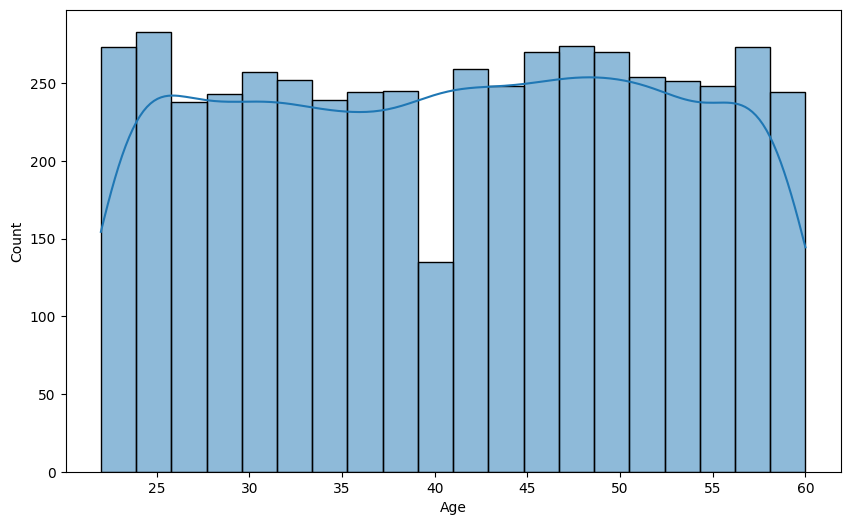

In [39]:
# Age Distribution
plt.figure(figsize = (10, 6))
plt.plot(xlabel = 'Age', ylabel = 'Frequency', title = 'Age Distribution')
sns.histplot(df['Age'], bins = 20, kde = True)
plt.show()

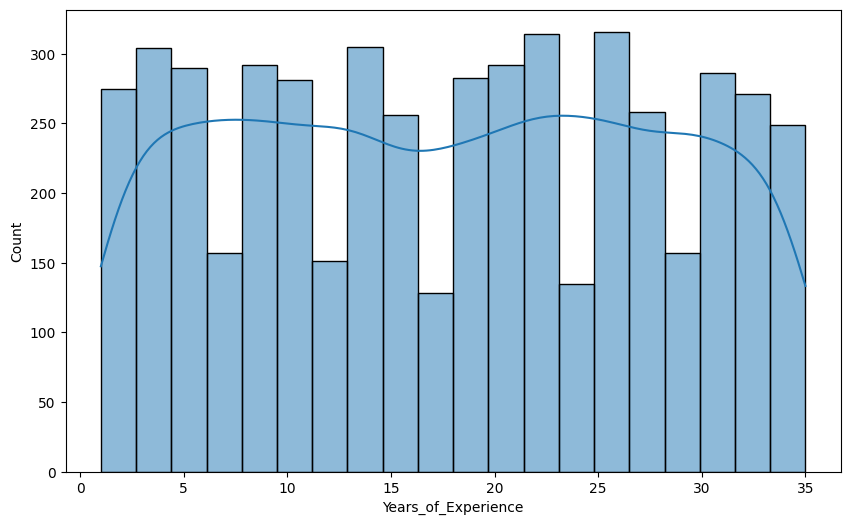

In [43]:
# Years of Experience Distribution
plt.figure(figsize = (10, 6))
plt.plot(xlabel = 'Years of Experience', ylabel = 'Frequency', title = 'Years of Experience Distribution')
sns.histplot(df['Years_of_Experience'], bins = 20, kde = True)
plt.show()

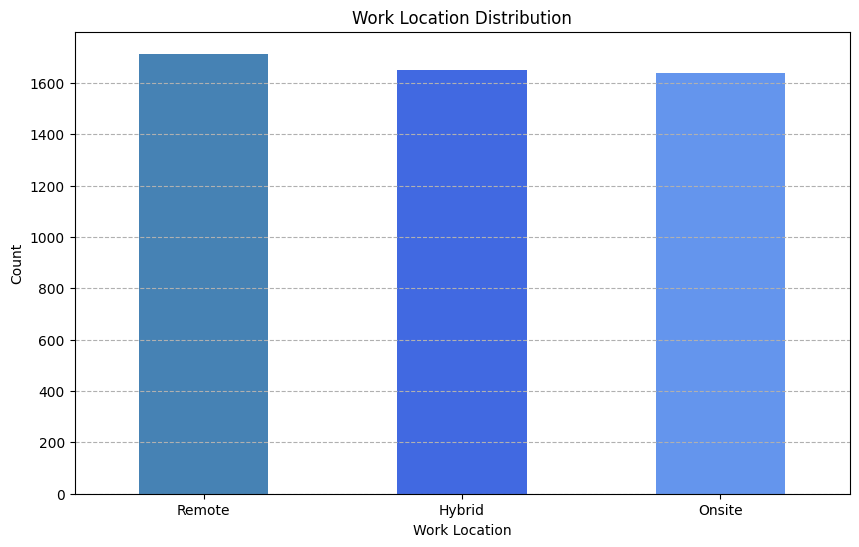

In [156]:
# Work Location Distribution
df['Work_Location'].value_counts().plot(kind = 'bar', color = ['steelblue', 'royalblue', 'cornflowerblue'], ylabel = 'Count', 
                                        xlabel = 'Work Location', title = 'Work Location Distribution', figsize = (10, 6))
plt.grid(axis = 'y', linestyle = '--')
plt.xticks(rotation = 0)
plt.show()

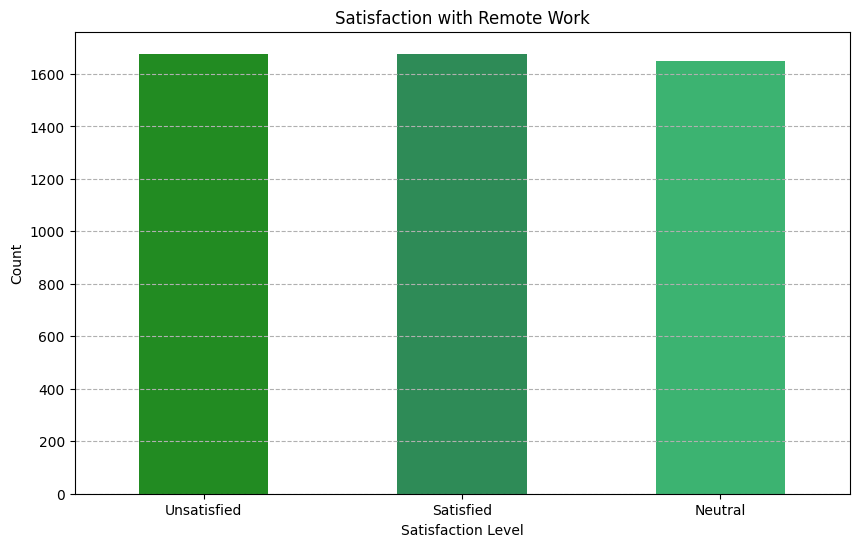

In [157]:
# Satisfaction with Remote Work Distribution
df['Satisfaction_with_Remote_Work'].value_counts().plot(kind = 'bar', color = ['forestgreen', 'seagreen', 'mediumseagreen'], ylabel = 'Count', 
                                        xlabel = 'Satisfaction Level', title = 'Satisfaction with Remote Work', figsize = (10, 6))
plt.grid(axis = 'y', linestyle='--')
plt.xticks(rotation = 0)
plt.show()

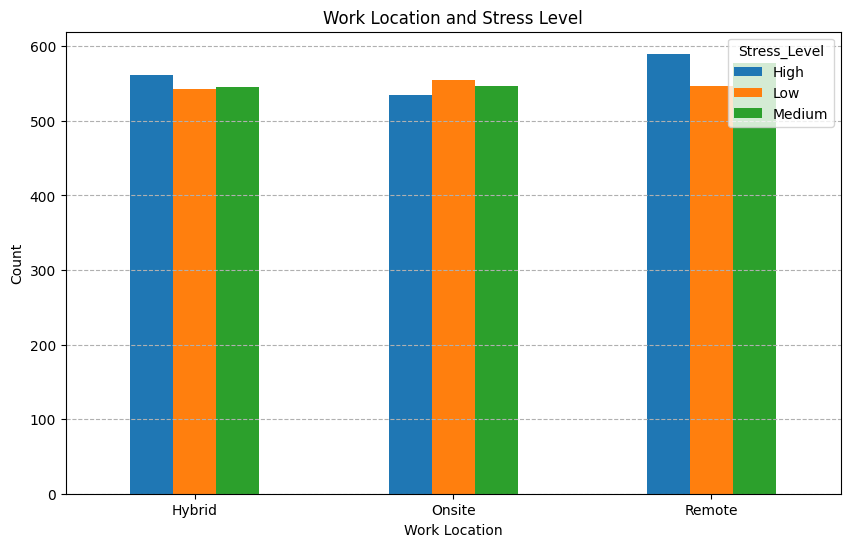

In [161]:
# Work Location and Stress Level
df.groupby(['Work_Location', 'Stress_Level'], observed = False).size().unstack().plot(kind = 'bar', xlabel = 'Work Location', ylabel = 'Count',
                                                                                     title = 'Work Location and Stress Level', figsize = (10, 6))
plt.grid(axis = 'y', linestyle = '--')
plt.xticks(rotation = 0)
plt.show()

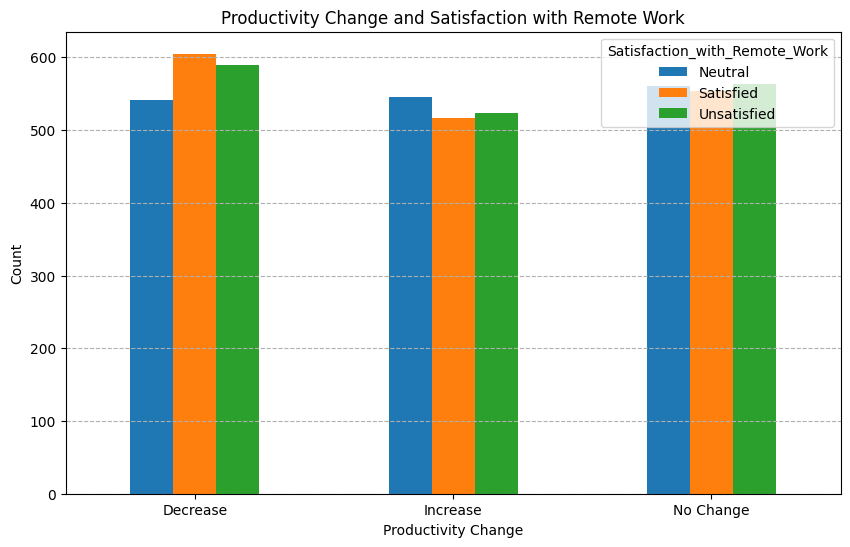

In [163]:
# Productivity Change and Satisfaction with Remote Work
df.groupby(['Productivity_Change', 'Satisfaction_with_Remote_Work'], observed = False).size().unstack().plot(kind = 'bar', 
            xlabel = 'Productivity Change', ylabel = 'Count', title = 'Productivity Change and Satisfaction with Remote Work', figsize = (10, 6))
plt.grid(axis = 'y', linestyle = '--')
plt.xticks(rotation = 0)
plt.show()

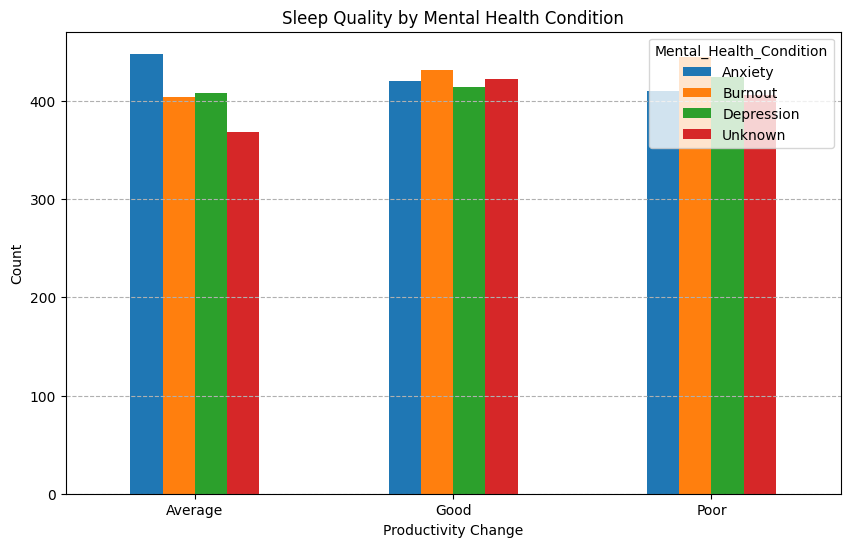

In [164]:
# Sleep Quality and Mental Health Conditions
df.groupby(['Sleep_Quality', 'Mental_Health_Condition'], observed = False).size().unstack().plot(kind = 'bar', 
            xlabel = 'Productivity Change', ylabel = 'Count', title = 'Sleep Quality by Mental Health Condition', figsize = (10, 6))
plt.grid(axis = 'y', linestyle = '--')
plt.xticks(rotation = 0)
plt.show()

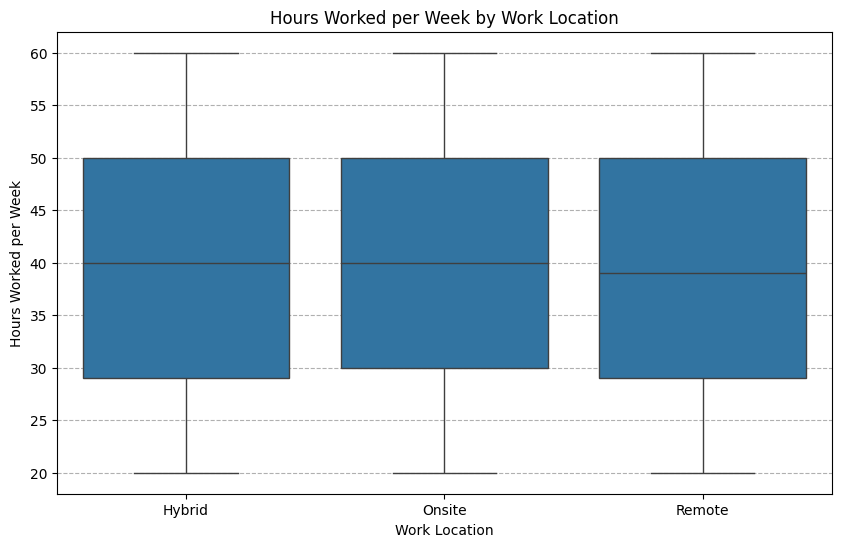

In [106]:
# Hours Worked per Week by Work Location
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Work_Location', y = 'Hours_Worked_Per_Week', data = df)
plt.xlabel('Work Location')
plt.ylabel('Hours Worked per Week')
plt.title('Hours Worked per Week by Work Location')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

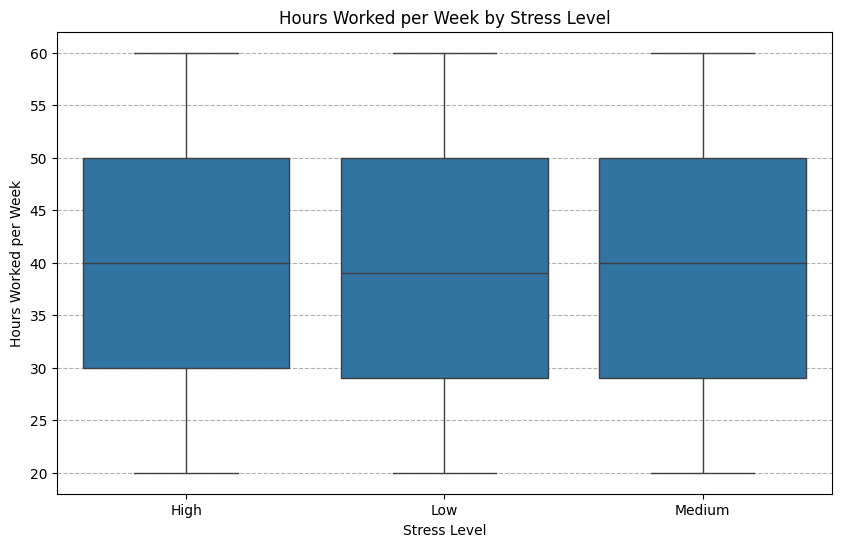

In [107]:
# Hours Worked Per Week by Stress Level
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Stress_Level', y = 'Hours_Worked_Per_Week', data = df)
plt.xlabel('Stress Level')
plt.ylabel('Hours Worked per Week')
plt.title('Hours Worked per Week by Stress Level')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

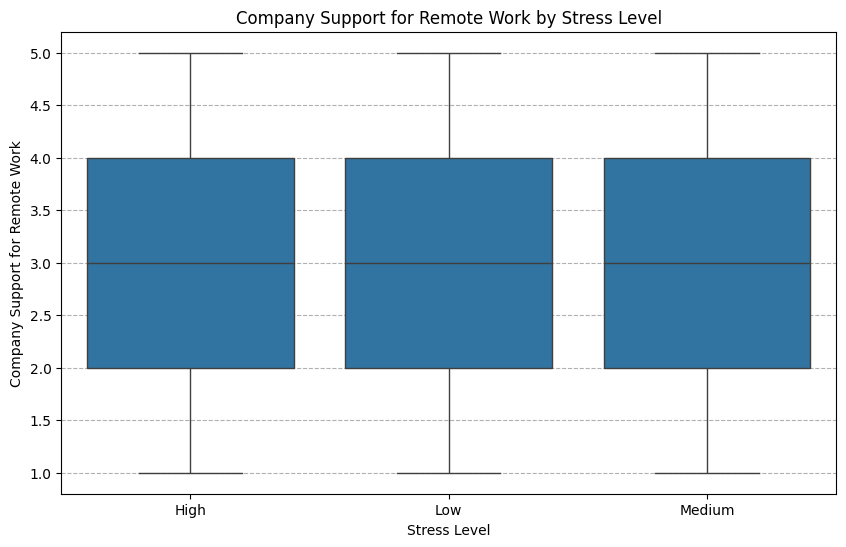

In [109]:
# Company Support for Remote Work by Stress Level
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Stress_Level', y = 'Company_Support_for_Remote_Work', data = df)
plt.xlabel('Stress Level')
plt.ylabel('Company Support for Remote Work')
plt.title('Company Support for Remote Work by Stress Level')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

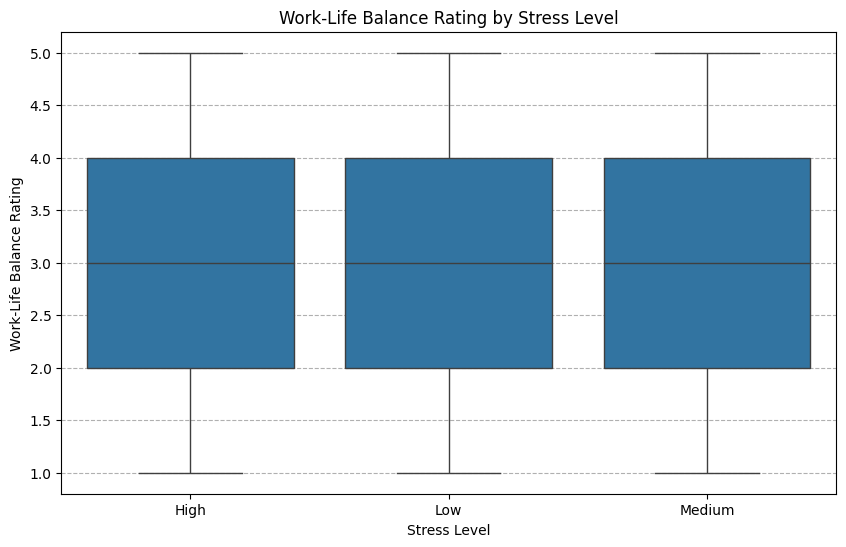

In [110]:
# Work-Life Balance Rating by Stress Level
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Stress_Level', y = 'Work_Life_Balance_Rating', data = df)
plt.xlabel('Stress Level')
plt.ylabel('Work-Life Balance Rating')
plt.title('Work-Life Balance Rating by Stress Level')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

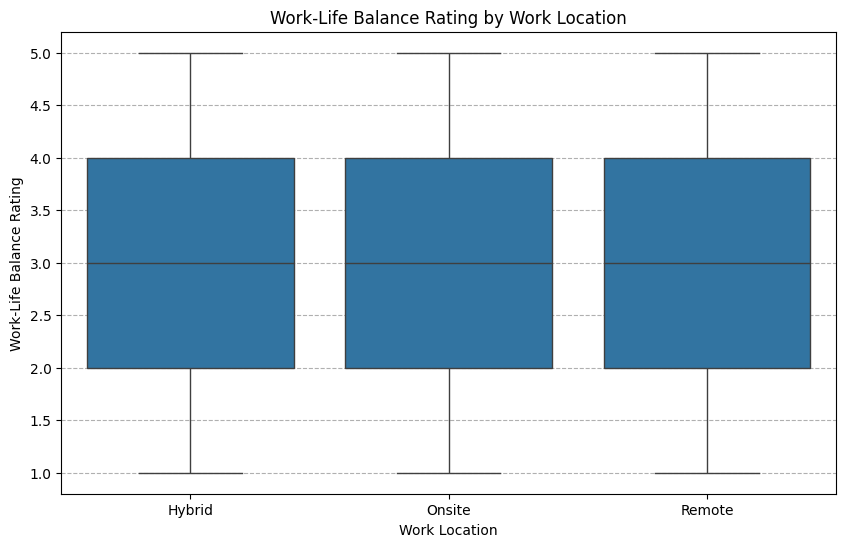

In [111]:
# Work-Life Balance Rating by Work Location
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Work_Location', y = 'Work_Life_Balance_Rating', data = df)
plt.xlabel('Work Location')
plt.ylabel('Work-Life Balance Rating')
plt.title('Work-Life Balance Rating by Work Location')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

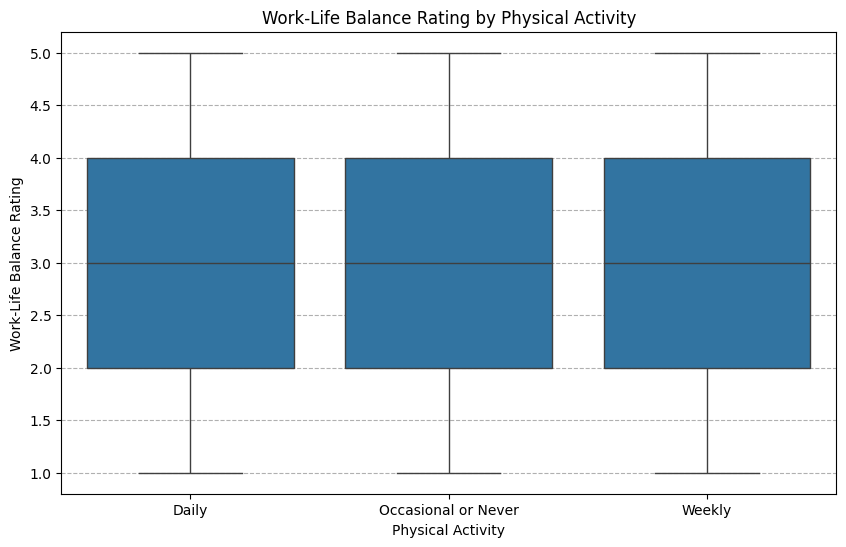

In [167]:
# Work-Life Balance Rating by Physical Activity
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Physical_Activity', y = 'Work_Life_Balance_Rating', data = df)
plt.xlabel('Physical Activity')
plt.ylabel('Work-Life Balance Rating')
plt.title('Work-Life Balance Rating by Physical Activity')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

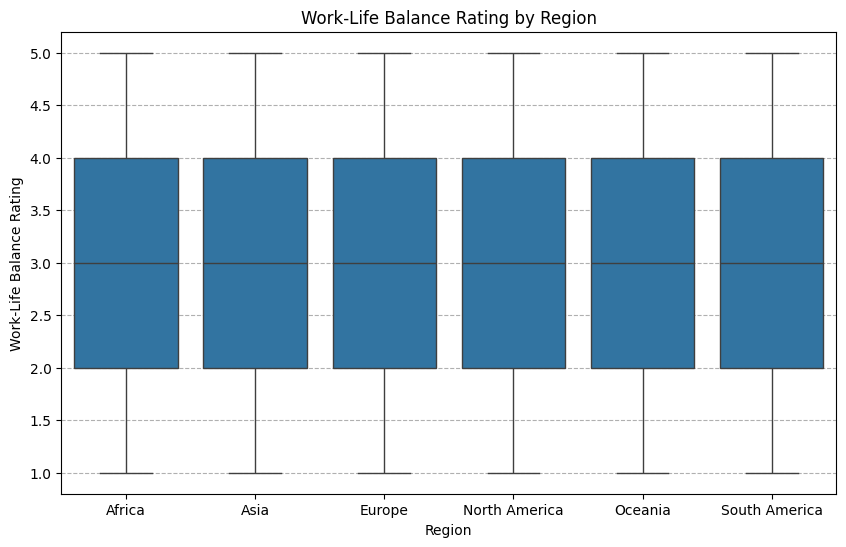

In [168]:
# Work-Life Balance Rating by Regional Differences
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Region', y = 'Work_Life_Balance_Rating', data = df)
plt.xlabel('Region')
plt.ylabel('Work-Life Balance Rating')
plt.title('Work-Life Balance Rating by Region')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

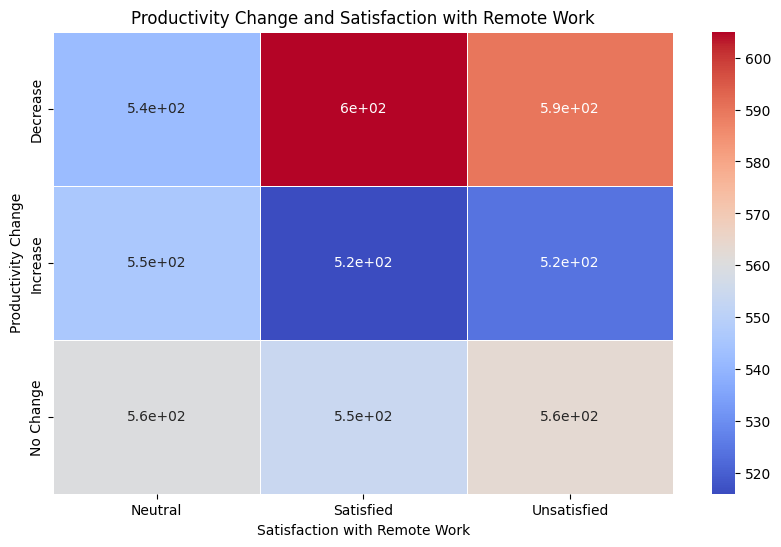

In [174]:
# Productivity Change and Satisfaction with Remote Work
productivity_satisfaction = df.pivot_table(index = 'Productivity_Change', columns = 'Satisfaction_with_Remote_Work', aggfunc = 'size',
                                           fill_value = 0, observed = False)
plt.figure(figsize = (10, 6))
sns.heatmap(productivity_satisfaction, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Productivity Change and Satisfaction with Remote Work')
plt.xlabel("Satisfaction with Remote Work")
plt.ylabel("Productivity Change")
plt.show()

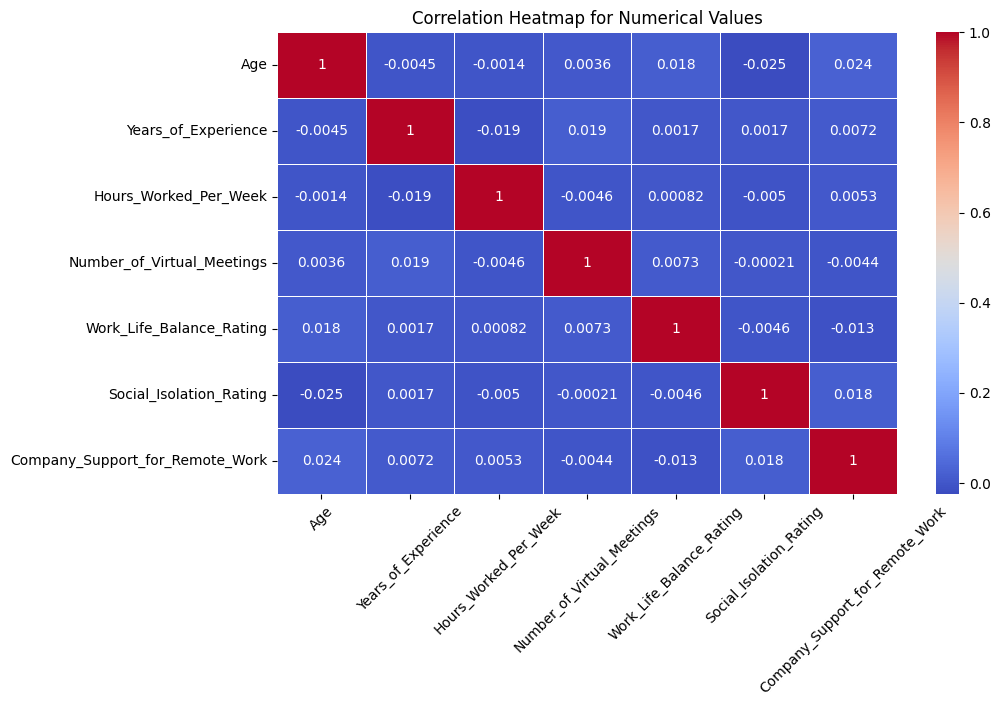

In [165]:
# Correlation Heatmap for Numerical Values
plt.figure(figsize = (10, 6))
numerical_df = df.select_dtypes(include = 'int64')
sns.heatmap(numerical_df.corr(), annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap for Numerical Values')
plt.xticks(rotation = 45)
plt.show()

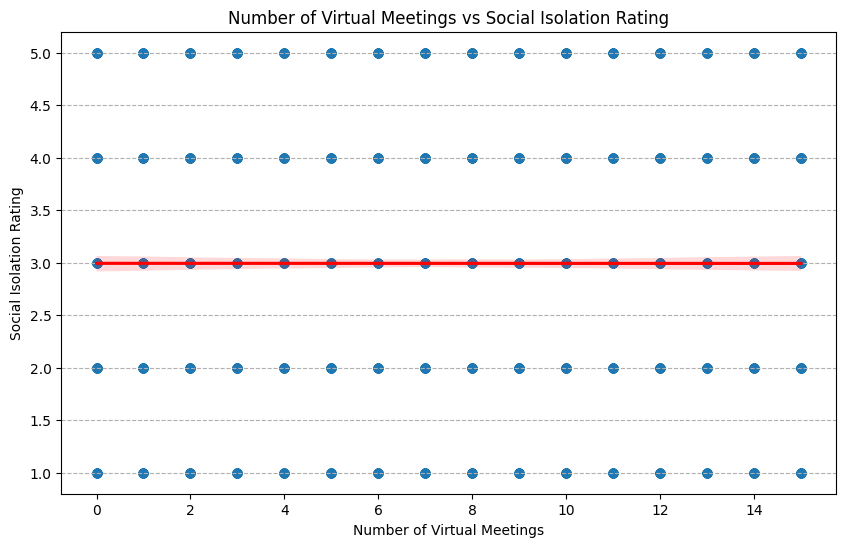

In [185]:
# Linear Regression plot for Number of Virtual Meetings and Social Isolation Rating
plt.figure(figsize = (10, 6))
sns.regplot(x = 'Number_of_Virtual_Meetings', y = 'Social_Isolation_Rating', data = df, line_kws = {"color": "red"})
plt.title('Number of Virtual Meetings vs Social Isolation Rating')
plt.xlabel('Number of Virtual Meetings')
plt.ylabel('Social Isolation Rating')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

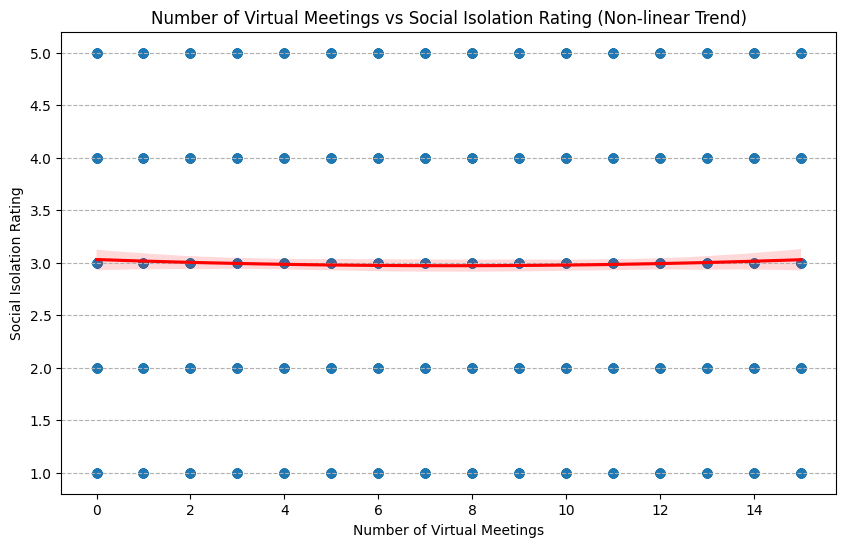

In [186]:
# Non-Linear Linear Regression plot for Number of Virtual Meetings and Social Isolation Rating
plt.figure(figsize = (10, 6))
sns.regplot(x = 'Number_of_Virtual_Meetings', y = 'Social_Isolation_Rating', data = df, line_kws = {"color": "red"}, order = 2).set(title="Number of Virtual Meetings vs Social Isolation Rating (Non-linear Trend)")
plt.title('Number of Virtual Meetings vs Social Isolation Rating (Non-linear Trend)')
plt.xlabel('Number of Virtual Meetings')
plt.ylabel('Social Isolation Rating')
plt.grid(axis = 'y', linestyle = '--')
plt.show()